### 1. Load the data

In [1]:
import numpy as np
import pandas as pd
from glob import glob
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
import tensorflow as tf

from keras.preprocessing import image
train = pd.read_csv("../../scene-classification/train.csv")
train_image = []
for i in range(train.shape[0]):
#     print(train['image_name'][i])
    img = image.load_img('../../scene-classification/train/'+train['image_name'][i], target_size=(150,150,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

Using TensorFlow backend.


In [2]:
from keras.utils import to_categorical
y=train['label'].values
# y = to_categorical(y)
print(y.shape)

(17034,)


### 2.Image Augmentation

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import preprocessing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

# print shape of training set
print('x_train shape:', x_train.shape)
# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')


x_train shape: (10901, 150, 150, 3)
10901 train samples
3407 test samples
2726 validation samples


### 3.Initial model architecture

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

model = Sequential()
# model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
#                         input_shape=(150, 150, 3)))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.2))
# model.add(Flatten())
# model.add(Dense(500, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(6, activation='softmax'))

model.add(Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(5,5))
model.add(Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(5,5))
model.add(Flatten())
model.add(Dense(180,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(6,activation='softmax'))

model.summary()
# SVG(model_to_dot(model).create(prog='dot', format='svg'))
# Utils.plot_model(model,to_file='model.png',show_shapes=True)

W1002 03:08:11.752146 139834832803584 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1002 03:08:11.772804 139834832803584 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1002 03:08:11.775824 139834832803584 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1002 03:08:11.804953 139834832803584 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 50)        45050     
__________

In [5]:
from keras import optimizers
# model.compile(loss='categorical_crossentropy',optimizer = optimizers.RMSprop(lr=1e-4),metrics=['acc'])
# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.compile(optimizer=optimizers.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


W1002 03:08:11.970715 139834832803584 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1002 03:08:11.976746 139834832803584 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.



In [6]:
# gpu_options = tf.GPUOptions(allow_growth=True)
# session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

In [7]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_valid, y_valid), verbose=1, shuffle=True)

W1002 03:08:12.176436 139834832803584 deprecation.py:323] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 10901 samples, validate on 2726 samples
Epoch 1/20
10901/10901 [==============================] - 209s 19ms/step - loss: 1.3998 - acc: 0.4328 - val_loss: 1.0454 - val_acc: 0.5719
Epoch 2/20
10901/10901 [==============================] - 200s 18ms/step - loss: 1.1582 - acc: 0.5457 - val_loss: 0.9708 - val_acc: 0.6178
Epoch 3/20
10901/10901 [==============================] - 201s 18ms/step - loss: 1.0449 - acc: 0.5997 - val_loss: 0.8332 - val_acc: 0.7054
Epoch 4/20
10901/10901 [==============================] - 201s 18ms/step - loss: 0.9231 - acc: 0.6687 - val_loss: 0.7362 - val_acc: 0.7395
Epoch 5/20
10901/10901 [==============================] - 201s 18ms/step - loss: 0.8042 - acc: 0.7180 - val_loss: 0.7536 - val_acc: 0.7238
Epoch 6/20
10901/10901 [==============================] - 201s 18ms/step - loss: 0.7299 - acc: 0.7507 - val_loss: 0.5965 - val_acc: 0.7905
Epoch 7/20
10901/10901 [==============================] - 201s 18ms/step - loss: 0.6711 - acc: 0.7759 - val_loss: 0.5

In [8]:
model.save("../../model_weights/CNN-93-76Model.h5")

### Calculate classification accuracy on test set

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8529498092862984


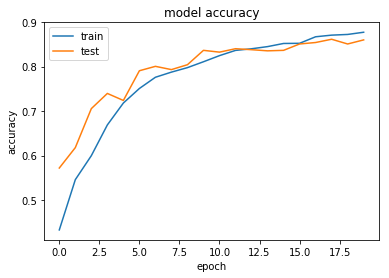

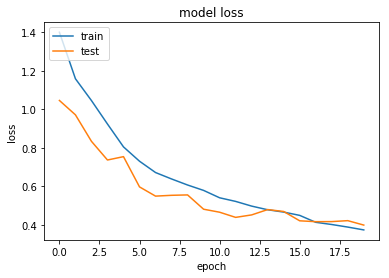

In [11]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
